<h3><b>Introduction to Data Analytics - Exercise set 2 - pandas-module</b></h3>

Put all your exercises (Jupyter Notebooks or Python-files) in your course Git-project.<br /><br />
<span style="font-weight: bold;">Use either code comments or Jupyter Notebook markdown (text) to document which exercise you are doing and what a certain code section does!</span><br />

<span style="font-weight: bold;">Remember: your Jupyter notebook's clarity (how easy it is to read and understand) also affects your scoring!</span><br /><br />
<span style="font-weight: bold;">Remember also: 
<span style="font-weight: bold;">If you use generative AI in any part of any exercise, 
MENTION IT CLEARLY! </span><br />
<span style="font-weight: bold;">(code comments are enough, also mention the prompts used).</span><br /><br />
See also the materials discussing the usage of AI in this course!</span><br /><br />


You can return all of these exercises in a single Jupyter Notebook, if you wish.

<b>The datasets for these exercises have been collected from kaggle.com<br />
(a service providing different datasets for practice)</b>

<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_2/es2_1.png" />

<h4><b>1. import pandas and read the csv-file found in Moodle (loans.csv). Use Python coding with pandas to answer the questions.</b></h4>


In [1117]:
# Importing Pandas.
import pandas as pd

# Converting loans.CSV to a Pandas DF.
df = pd.read_csv('loans.csv')
df.head(3)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.00,Short Term,709.00,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,NaN,6.00,1.00,228190.00,416746.00,1.00,0.00
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.00,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,8.00,35.00,0.00,229976.00,850784.00,0.00,0.00
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.00,Short Term,741.00,2231892.00,8 years,Own Home,Debt Consolidation,29200.53,14.90,29.00,18.00,1.00,297996.00,750090.00,0.00,0.00


<li>Remove the Customer ID –column from data</li>
<li>Print the head of the data</li>

In [ ]:
# remove the column and print out the head of the DataFrame
df = df.drop('Customer ID', axis=1)
df.head(3)

,Loan ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,Fully Paid,445412.00,Short Term,709.00,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,NaN,6.00,1.00,228190.00,416746.00,1.00,0.00
1,4771cc26-131a-45db-b5aa-537ea4ba5342,Fully Paid,262328.00,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,8.00,35.00,0.00,229976.00,850784.00,0.00,0.00
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,Fully Paid,99999999.00,Short Term,741.00,2231892.00,8 years,Own Home,Debt Consolidation,29200.53,14.90,29.00,18.00,1.00,297996.00,750090.00,0.00,0.00


<ul>
    <li>Remove rows from the data that have <b style="color: red;">a too large of a loan</b> (Current Loan Amount should be less than 99999999)</li>
    <ul>
        <li><b>Tip:</b> use conditional filtering!</li>
    </ul>
</ul>

In [1119]:
# Removing loans that are unreasonable large
loan_amounts = df['Current Loan Amount']

# Values larger than 999999999 are excluded using conditional
# filtering.
df = df[loan_amounts < 99999999]

# Checking to make sure there are no values higher than 999999999.
print(f"Highest loan amount: {loan_amounts.max()}")

Highest loan amount: 99999999.0


<ul>
    <li>Remove rows that have the annual income as NaN (not a number)</li>
    <ul>
        <li><b>Extra task:</b> use imputation and average income as the value instead of NaN</li>
    </ul>
</ul>

In [1120]:
# remove rows if annual income is NaN

# we're going to create a new variable so we keep the
# NaN changes in the next exercise.
df_subset = df[df['Annual Income'] > 500]

# verifying that there is in fact zero NaN values in Annual Income
df_subset.isna().sum()


Loan ID                             0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                        0
Annual Income                       0
Years in current job             2984
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    36320
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 1
Bankruptcies                      135
Tax Liens                           5
dtype: int64

In [1121]:
# Extra task, using imputation and mean to replace
# the NaN values in Annual Income.

df.fillna({"Annual Income": df["Annual Income"].mean()}, inplace=True)
df.isna().sum()

Loan ID                             0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                       0
Years in current job             3794
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    46788
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      177
Tax Liens                           9
dtype: int64

<li>Get the average Current Loan Amount (there are many ways to do this)</li>

In [1122]:
# Getting the average loan amount using mean
average_current_loan = df['Current Loan Amount'].mean()

# Rounded to two decimals because it is currency.
print(f" The average current loan amount: {average_current_loan.round(2)}")

 The average current loan amount: 312313.6


<li>Get the highest and lowest Annual Income in the dataset</li>

In [1123]:
# get highest and lowest annual income in dataset using min() and max()
lowest_annual_income = df['Annual Income'].min()
highest_annual_income = df['Annual Income'].max()

# rounded to two decimals because it is currency.
print(f"The lowest annual income: {lowest_annual_income.round(2)}")
print(f"The highest annual income: {highest_annual_income.round(2)}")

The lowest annual income: 76627.0
The highest annual income: 165557393.0


<li>Get the Home Ownership value of the <b>Loan ID = bbf87a87-22cd-4d10-bd9b-7a9cc1b6e59d</b></li>

In [1124]:
# Retrieving the Home Ownership value from the given loan ID.

# selecting the desired row with the given values.
row = df[df["Loan ID"] == 'bbf87a87-22cd-4d10-bd9b-7a9cc1b6e59d']

# printing the Home Ownership value of the selected row.
print(row["Home Ownership"])

491    Own Home
Name: Home Ownership, dtype: object


<li>Create a new field into your dataset called <b>Actual Annual Income</b>.</li>
<br><b>Note:</b> The Actual Annual Income follows this formula:<br>
<b style="color: green">Annual Income – 12 * Monthly Debt</b><br><br>


In [1125]:
# create a new field for Actual Annual income (annual income - 12 * monthly debt)
df['Actual Annual Income'] = df['Annual Income'] - 12 * df['Monthly Debt']
df.head().round(2)

,Loan ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Actual Annual Income
0,14dd8831-6af5-400b-83ec-68e61888a048,Fully Paid,445412.00,Short Term,709.00,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,NaN,6.00,1.00,228190.00,416746.00,1.00,0.00,1104916.12
1,4771cc26-131a-45db-b5aa-537ea4ba5342,Fully Paid,262328.00,Short Term,NaN,1373245.98,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,8.00,35.00,0.00,229976.00,850784.00,0.00,0.00,973694.22
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,Fully Paid,347666.00,Long Term,721.00,806949.00,3 years,Own Home,Debt Consolidation,8741.90,12.00,NaN,9.00,0.00,256329.00,386958.00,0.00,0.00,702046.20
4,d4062e70-befa-4995-8643-a0de73938182,Fully Paid,176220.00,Short Term,NaN,1373245.98,5 years,Rent,Debt Consolidation,20639.70,6.10,NaN,15.00,0.00,253460.00,427174.00,0.00,0.00,1125569.58
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,Charged Off,206602.00,Short Term,7290.00,896857.00,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.30,NaN,6.00,0.00,215308.00,272448.00,0.00,0.00,700444.12


<li>Get the Actual Annual Income of the loan with the <b>ID = 76fa89b9-e6a8-49af-afa1-8151315aba8e</b></li>

In [1126]:
# get the Actual Annual income (the new column) for the needed ID
row = df[df['Loan ID'] == '76fa89b9-e6a8-49af-afa1-8151315aba8e']
row

# duplicates with the same ID are likely not intended, so 
# let's drop the duplicates. this will make the df more accurate.
df = df.drop_duplicates()


<li>Get the Loan ID of the loan with the smallest Actual Annual Income </li>

In [1127]:
# get loan ID of lowest Actual Annual income (the new column)
smallest_actual_income = df['Actual Annual Income'].min()
print(f"the smallest Actual Annual Income: {smallest_actual_income.round(2)}")

the smallest Actual Annual Income: -456900.9


<li>How many loans are "Long term"?</li>

In [1128]:
# produce code that shows many loans are long term
print(f" Amount of long term loans: {df['Term'].count()}")

 Amount of long term loans: 78301


<li>How many loaners have more than 1 bankruptcy?</li>

In [1129]:
# produce code that shows how many loaners have more than 1 bankruptcy
# creating helper variable for bankrupcies column.
bankruptcies_column = df['Bankruptcies']

# counting the bankruptcies column where bankrupcies are greater than 1.
bankruptcies_column[df['Bankruptcies'] > 1].count()

np.int64(411)

<li>How many Short Term loans are for Home Improvements?</li>

In [1130]:
# produce code that shows how many of the Short Term loans are for Home Improvements
short_term_loans = df[df['Term'] == "Short Term"]
home_improvement_loans = df[df['Purpose'] == "Home Improvements"]

filtered_df = short_term_loans + home_improvement_loans
print(f" Amount of short term loans for home impprovements: {filtered_df['Term'].count()}")

 Amount of short term loans for home impprovements: 3163


<li>How many unique loan purposes are there?</li>

In [1131]:
# produce code that shows how many unique loan purposes there are
df['Purpose'].nunique()


16

<li>What are the 3 most common loan purposes?</li>

In [1132]:
# produce code that shows the 3 most common loan purposes
# value_counts does what it says, counts the number of values with the specified conditions
# .head(3) limits it to the top three most common loans.
df['Purpose'].value_counts().head(3)

Purpose
Debt Consolidation    61788
other                  4607
Home Improvements      4522
Name: count, dtype: int64

<li>Is there a correlation between <b>Annual Income</b> and <b>Number of Open Accounts</b> or is there a correlation between <b>Number of Credit Problems</b> and <b>Bankruptcies</b>?</li>
<br />
<b>EXPLAIN AND DISCUSS YOUR FINDINGS AS WELL! (code comments or markdown)</b>

In [1133]:
# produce code that shows which correlation statement is true
correlation1 = df['Annual Income'].corr(df['Number of Open Accounts'])
correlation2 = df['Number of Credit Problems'].corr(df['Bankruptcies'])

print("Correlation values: ")
print(f"Annual Income, Number of Open Accounts: {correlation1.round(2)}")
print(f"Number of Credit Problems, Bankruptcies: {correlation2.round(2)}")

Correlation values: 
Annual Income, Number of Open Accounts: 0.12
Number of Credit Problems, Bankruptcies: 0.75


---

#### Student's Correlation findings:

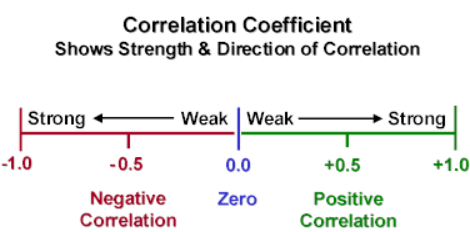

*taken from edugyan.in*

There is **hardly any correlation** between **Annual Income and Number of Open Accounts**. 

However, there is a **significant (strong) correlation** between **Credit Problems and Brankrupties**.


---

<h4><b>2. Download the purchases.csv from Moodle, and do the following observations:</b></h4>


In [1134]:
# loading the file 'purchases.csv into a pandas dataframe
df = pd.read_csv('purchases.csv')
df.head()

,Creation Date,Purchase Date,Fiscal Year,LPA Number,Purchase Order Number,Requisition Number,Acquisition Type,Acquisition Method,Department Name,Supplier Code,...,Classification Codes,Normalized UNSPSC,Commodity Title,Class,Class Title,Family,Family Title,Segment,Segment Title,Location
0,09/05/2012,08/31/2012,2012-2013,NaN,4500149558,NaN,NON-IT Goods,Formal Competitive,"Corrections and Rehabilitation, Department of",48199.00,...,50405625,50405625.00,Jalapeno peppers,50405600.00,Peppers,50400000.00,Fresh vegetables,50000000.00,Food Beverage and Tobacco Products,"93706\r\n(36.675079, -119.865393)"
1,10/18/2012,10/18/2012,2012-2013,NaN,4500156192,NaN,NON-IT Goods,Informal Competitive,"Corrections and Rehabilitation, Department of",1327540.00,...,50301541,50301541.00,Ida red apples,50301500.00,Apples,50300000.00,Fresh fruits,50000000.00,Food Beverage and Tobacco Products,"91360\r\n(34.210392, -118.874313)"
2,10/17/2012,10/17/2012,2012-2013,NaN,4500156124,NaN,NON-IT Goods,Fair and Reasonable,Correctional Health Care Services,45803.00,...,55101506,55101506.00,Magazines,55101500.00,Printed publications,55100000.00,Printed media,55000000.00,Published Products,"95827\r\n(38.563097, -121.328511)"
3,10/30/2012,10/24/2012,2012-2013,NaN,S2556056,NaN,NON-IT Goods,Informal Competitive,"Parks & Recreation, Department of",1746707.00,...,10121505,10121505.00,Hay,10121500.00,Livestock feed,10120000.00,Animal feed,10000000.00,Live Plant and Animal Material and Accessories...,NaN
4,11/14/2012,11/14/2012,2012-2013,NaN,4500159228,NaN,NON-IT Goods,Informal Competitive,"Corrections and Rehabilitation, Department of",1065902.00,...,50201706,50201706.00,Coffee,50201700.00,Coffee and tea,50200000.00,Beverages,50000000.00,Food Beverage and Tobacco Products,"95696\r\n(38.43, -122.02)"


<li>What was the total price sum of the Purchase Order Number 018H2015? (14 rows in total)</li>

In [1135]:
# produce the code that gets the needed total price sum
# selecting the order number '018H2015'
order_number_price_sum = df[df['Purchase Order Number'] == '018H2015']

# using sum on all fourteen rows
order_number_price_sum = order_number_price_sum['Total Price'].sum()

# rounding by two (since it is currency)
print(f" Sum of Purchase Order Number 018H2015: {order_number_price_sum.round(2)}")


 Sum of Purchase Order Number 018H2015: 1245.04


<li>What is the name and description of the purchased item with the Purchase Order Number 3176273?</li>

In [1136]:
# produce the code that gets the needed name and description
description_order_number = df[df['Purchase Order Number'] == '3176273']

# double brackets are used because the input requires a list of items.
description_order_number[['Item Name', 'Item Description']]

,Item Name,Item Description
103,PC Desktop,HP Prodesk 600


<li>How many occasions (rows) of purchase data happened during the year 2013?</li>

In [1137]:
# produce the code that filters the needed data for year 2013
rows_year_2013 = df[df['Purchase Date'].str.find('2013') >= 0]
rows_year_2013

,Creation Date,Purchase Date,Fiscal Year,LPA Number,Purchase Order Number,Requisition Number,Acquisition Type,Acquisition Method,Department Name,Supplier Code,...,Classification Codes,Normalized UNSPSC,Commodity Title,Class,Class Title,Family,Family Title,Segment,Segment Title,Location
8,06/23/2013,07/01/2013,2012-2013,5-08-89-15,4500187456,NaN,NON-IT Goods,Statewide Contract,"Corrections and Rehabilitation, Department of",1000709.00,...,50401824,50401824.00,Green beans,50401800.00,Beans,50400000.00,Fresh vegetables,50000000.00,Food Beverage and Tobacco Products,NaN
11,06/29/2013,07/01/2013,2012-2013,5-08-89-15,4500188538,NaN,NON-IT Goods,Statewide Contract,"Corrections and Rehabilitation, Department of",1000709.00,...,50401824,50401824.00,Green beans,50401800.00,Beans,50400000.00,Fresh vegetables,50000000.00,Food Beverage and Tobacco Products,NaN
18,01/31/2013,01/31/2013,2012-2013,NaN,1613000145,NaN,NON-IT Goods,SB/DVBE Option,"Transportation, Department of",1553400.00,...,55121734,55121734.00,Sign sheeting material,55121700.00,Signage,55120000.00,Signage and accessories,55000000.00,Published Products,"95658\r\n(38.876154, -121.146865)"
19,01/16/2013,01/17/2013,2012-2013,NaN,2012-0754,NaN,NON-IT Goods,Services are specifically exempt by policy,"Equalization, Board of",1747193.00,...,82121506,82121506.00,Publication printing,82121500.00,Printing,82120000.00,Reproduction services,82000000.00,Editorial and Design and Graphic and Fine Art ...,NaN
20,02/06/2013,02/06/2013,2012-2013,5-08-89-15,4500169049,NaN,NON-IT Goods,Statewide Contract,"Corrections and Rehabilitation, Department of",1000709.00,...,50401824,50401824.00,Green beans,50401800.00,Beans,50400000.00,Fresh vegetables,50000000.00,Food Beverage and Tobacco Products,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62652,08/22/2013,08/23/2013,2013-2014,1-10-75-60A,S3863002,NaN,NON-IT Goods,Statewide Contract,"Parks & Recreation, Department of",1087660.00,...,44103103,44103103.00,Printer or facsimile toner,44103100.00,Printer and facsimile and photocopier supplies,44100000.00,Office machines and their supplies and accesso...,44000000.00,Office Equipment and Accessories and Supplies,"95814\r\n(38.580427, -121.494396)"
62653,08/22/2013,08/23/2013,2013-2014,1-10-75-60A,S3863002,NaN,NON-IT Goods,Statewide Contract,"Parks & Recreation, Department of",1087660.00,...,44103103,44103103.00,Printer or facsimile toner,44103100.00,Printer and facsimile and photocopier supplies,44100000.00,Office machines and their supplies and accesso...,44000000.00,Office Equipment and Accessories and Supplies,"95814\r\n(38.580427, -121.494396)"
62654,08/22/2013,08/23/2013,2013-2014,1-10-75-60A,S3863002,NaN,NON-IT Goods,Statewide Contract,"Parks & Recreation, Department of",1087660.00,...,44103103,44103103.00,Printer or facsimile toner,44103100.00,Printer and facsimile and photocopier supplies,44100000.00,Office machines and their supplies and accesso...,44000000.00,Office Equipment and Accessories and Supplies,"95814\r\n(38.580427, -121.494396)"
62655,08/24/2013,08/23/2013,2013-2014,NaN,2U3H1109,NaN,NON-IT Services,Emergency Purchase,"Forestry and Fire Protection, Department of",1015235.00,...,76122402,76122402.00,Equipment usage fee,76122400.00,Refuse disposal and treatment fees,76120000.00,Refuse disposal and treatment,76000000.00,Industrial Cleaning Services,"95901\r\n(39.195356, -121.495425)"


<ul><li>What are the 5 most common Departments in the data?</li>
<ul><li><b>Extra task: </b>What are 3 Departments using most money in the data?</li></ul>
</ul>

In [1138]:
# produce the code that test the needed most common departments
df['Department Name'].value_counts().head(5)

Department Name
Corrections and Rehabilitation, Department of    10891
Correctional Health Care Services                 6593
Water Resources, Department of                    4582
Forestry and Fire Protection, Department of       4526
State Hospitals, Department of                    4281
Name: count, dtype: int64

In [1139]:
# Extra task: Producing the 3 departments using the most money in the data. 
# This makes sure pandas only gives two decimals and doesn't provide scientific notation.
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# This method groups a nonaggregate with an aggregate input, in this case sum()
df.groupby('Department Name')['Total Price'].sum()





Department Name
Administrative Law, Office of                                     50000.00
African American Museum, California                              103122.44
Aging, Department of                                           82834987.10
Agricultural Labor Relations Board                               606301.79
Air Resources Board                                            29725687.33
                                                                  ...     
Treasurer, Office of the State                                  5567872.91
Veterans Affairs, Department of                                35093998.31
Victim Compensation and Government Claims Board, California    19184750.23
Water Resources Control Board, State                           68704217.87
Water Resources, Department of                                591496042.97
Name: Total Price, Length: 103, dtype: float64

<li>Sort the data by Department Name</li>

In [1140]:
# sort the data by department name
df.sort_values('Department Name')

,Creation Date,Purchase Date,Fiscal Year,LPA Number,Purchase Order Number,Requisition Number,Acquisition Type,Acquisition Method,Department Name,Supplier Code,...,Classification Codes,Normalized UNSPSC,Commodity Title,Class,Class Title,Family,Family Title,Segment,Segment Title,Location
6,11/30/2012,06/15/2012,2012-2013,NaN,11OAL07,NaN,NON-IT Goods,NCB,"Administrative Law, Office of",1001493.00,...,55101524,55101524.00,Reference books,55101500.00,Printed publications,55100000.00,Printed media,55000000.00,Published Products,"95833\r\n(38.615723, -121.50562)"
519,11/30/2012,06/15/2012,2012-2013,NaN,11OAL09,NaN,NON-IT Goods,NCB,"Administrative Law, Office of",1657720.00,...,55101524,55101524.00,Reference books,55101500.00,Printed publications,55100000.00,Printed media,55000000.00,Published Products,"55123\r\n(44.807169, -93.136157)"
20018,11/30/2012,06/15/2012,2012-2013,NaN,11OAL10,NaN,NON-IT Goods,NCB,"Administrative Law, Office of",1657720.00,...,55101524,55101524.00,Reference books,55101500.00,Printed publications,55100000.00,Printed media,55000000.00,Published Products,"55123\r\n(44.807169, -93.136157)"
31381,02/21/2013,03/20/2013,2012-2013,NaN,11-12201,NaN,NON-IT Services,Informal Competitive,"African American Museum, California",7341.00,...,82101801,82101801.00,Advertising campaign services,82101800.00,Advertising agency services,82100000.00,Advertising,82000000.00,Editorial and Design and Graphic and Fine Art ...,"90017\r\n(34.052895, -118.2642)"
27820,01/03/2013,02/14/2011,2012-2013,NaN,11-12175,NaN,NON-IT Services,Informal Competitive,"African American Museum, California",1749414.00,...,78141501,78141501.00,Freight forwarders services,78141500.00,Transport arranging services,78140000.00,Transport services,78000000.00,Transportation and Storage and Mail Services,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24826,12/17/2012,12/15/2012,2012-2013,NaN,4500192615,NaN,NON-IT Goods,Formal Competitive,"Water Resources, Department of",16299.00,...,27131603\r\n40141605,27131603.00,Air regulators,27131600.00,Air fittings and connectors,27130000.00,Pneumatic machinery and equipment,27000000.00,Tools and General Machinery,"93390\r\n(35.373405, -119.018911)"
49068,06/13/2013,06/12/2013,2012-2013,NaN,4500199013,NaN,IT Goods,Informal Competitive,"Water Resources, Department of",1016373.00,...,43232605,43232605.00,Analytical or scientific software,43232600.00,Industry specific software,43230000.00,Software,43000000.00,Information Technology Broadcasting and Teleco...,1760\r\n
49069,03/26/2014,03/25/2014,2013-2014,NaN,4500208992,NaN,NON-IT Goods,State Programs,"Water Resources, Department of",1743406.00,...,15101506,15101506.00,Gasoline or Petrol,15101500.00,Petroleum and distillates,15100000.00,Fuels,15000000.00,Fuels and Fuel Additives and Lubricants and An...,NaN
49057,06/13/2013,06/12/2013,2012-2013,NaN,4500199013,NaN,IT Goods,Informal Competitive,"Water Resources, Department of",1016373.00,...,81112217,81112217.00,Industry specific software maintenance,81112200.00,Software maintenance and support,81110000.00,Computer services,81000000.00,Engineering and Research and Technology Based ...,1760\r\n


<ul>
<li><b>Small extra tasks for extra points</b></li>
<ul>
<li>How many purchases in the data where IT Goods and had the total price more than 50000 dollars?</li>
<li>How many of the purchases have anything to do with IT? (IT Goods, IT Services, IT Telecommunications)</li>

</ul>
</ul>

In [1141]:
# How many purchases in the data where IT Goods and had the total price more than 50000 dollars?
it_goods = df[df['Acquisition Type'] == 'IT Goods']
it_goods = it_goods[df['Total Price'] > 50000].count().sum()
print(f" Number of purchases in IT over $50,000: {it_goods}")

 Number of purchases in IT over $50,000: 18475


C:\Users\kykis\AppData\Local\Temp\ipykernel_6596\3166383867.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  it_goods = it_goods[df['Total Price'] > 50000].count().sum()


In [1142]:
# How many of the purchases have anything to do with IT?
it_goods_count = df[df['Acquisition Type'] == 'IT Goods'].count()
print(f" Amount of purchases that have to do with IT: {it_goods_count['Item Name']}")

 Amount of purchases that have to do with IT: 7811


<ul>
<li><b>Other extra tasks for extra points</b></li>
<ul>
<li>Create a new DataFrame, where you have filtered out purchases that have a Total Price of 0 or less</li>
<li>For this DataFrame, use groupby() –function twice to group the purchases data by Acquisition Type, and then calculating the result first by sum() and then by mean()</li>
<li>Which two acquisition types have the largest sums and means after grouping the data?</li>
</ul>
</ul>

In [1143]:
# produce the code for the extra tasks if you wish to complete them
# creating the dataframe
df = pd.read_csv('purchases.csv')

# EXTRA TASK 1: The new dataframe, where purchases at zero or lower are filtered out
df = df[df['Total Price'] > 0 ] 
print(f" The lowest total price in the DataFrame: $ {df['Total Price'].min()} ")

 The lowest total price in the DataFrame: $ 0.01 


In [1144]:
# EXTRA TASK 2: using groupby() on the purchase data by acquisition type, then using sum() and mean()


<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_2/es2_2.png" />

<h4><b>3. Download the data_salaries_india.csv from Moodle, and consider the following questions of the data. Use any means in pandas (or even NumPy) you wish to explain your answers.</b></h4>


<ul>
<li>Before we can do anything with the salaries, we have to convert them into something more usable</li>
<ul>
<li>Note: the salaries can be yearly, monthly or hourly salaries</li>
<ul>
<li>We don't also need the Indian rupee –sign (₹)</li>
</ul>
<li>You can use the template in Moodle to help you out with this (Salary filtering, pandas exercise 3)</li>
</ul>
</ul>

In [1145]:
# Loading the data into pandas.
df = pd.read_csv('data_salaries_india.csv')
df.head()

,Company Name,Job Title,Role,Salaries Reported,Location,Salary
0,Giftiicon,Data Scientist,Manager,1,Bangalore,"₹18,57,305/yr"
1,Tiger Analytics,Data Analyst,Specialist,1,Mumbai,"₹7,50,000/yr"
2,Omdena,Machine Learning Engineer,Specialist,1,New Delhi,"₹1,28,988/yr"
3,Tableau Software,Data Engineer,Specialist,1,Pune,"₹2,07,164/mo"
4,Toyota North America,Data Scientist,Specialist,1,Bangalore,"₹9,12,580/yr"


In [1146]:
# converting the Salary column data to something more useful.
# Replacing the rupee symbol and commas.
df['Salary'] = df['Salary'].str.replace('₹','')
df['Salary'] = df['Salary'].str.replace(',','')
df.head(3)

,Company Name,Job Title,Role,Salaries Reported,Location,Salary
0,Giftiicon,Data Scientist,Manager,1,Bangalore,1857305/yr
1,Tiger Analytics,Data Analyst,Specialist,1,Mumbai,750000/yr
2,Omdena,Machine Learning Engineer,Specialist,1,New Delhi,128988/yr


In [1147]:
# A function to convert all salaries to a monthly wage.
def convert_to_monthly_salary(salary):

  # split the salary into numbers and the denominator (year, month, hour)
  salary_split= salary.split('/')
  salary_split[0] = int(salary_split[0])

  # if the salary is calculated per year...
  # convert it to a monthly salary ( 12 months in a year)
  if salary_split[1] == "yr":
    monthly_salary = salary_split[0] / 12
  
  # if the salary is calculated per hour...
  # assume full time hours (40 hours over 4 weeks) and calculate it 
  # to a monthly salary
  elif salary_split[1] == "hr":
    monthly_salary = salary_split[0] * (40 * 4)

  # if the salary is calculated monthly...
  # then simply return the numbers, it's in the right format!
  else: 
    monthly_salary = salary_split[0]
  
  # converting from float to integer, to prevent trailing decimals.
  monthly_salary = int(monthly_salary)
  return monthly_salary

# applying the filter to the data
df['Salary'] = df['Salary'].apply(convert_to_monthly_salary)
df.head()


,Company Name,Job Title,Role,Salaries Reported,Location,Salary
0,Giftiicon,Data Scientist,Manager,1,Bangalore,154775
1,Tiger Analytics,Data Analyst,Specialist,1,Mumbai,62500
2,Omdena,Machine Learning Engineer,Specialist,1,New Delhi,10749
3,Tableau Software,Data Engineer,Specialist,1,Pune,207164
4,Toyota North America,Data Scientist,Specialist,1,Bangalore,76048


<ul>
<li>What are the most common values in different fields (Job Titles, Companies, Location)? <b>Based on the distribution, is the data balanced or not?</b></li>
<ul>
<li><b>Extra task:</b> there seem to be some Job Titles that are almost the same, like "Machine Learning Data Associate" and "Machine Learning Associate", combine these into something common to reduce amount of options</li>
</ul>
</ul>

In [1148]:
# Produce the code that shows the most common values in different fields
# (Job titles, Companies, Location).
print("The most common job titles:")
df['Job Title'].value_counts()


The most common job titles:


Job Title
Data Scientist                              2165
Data Analyst                                1167
Data Engineer                                948
Machine Learning Engineer                    683
Data Science                                  54
Senior Data Scientist                         45
Junior Data Scientist                         22
Senior Machine Learning Engineer              10
Lead Data Scientist                            6
Software Engineer - Machine Learning           3
Machine Learning Scientist                     2
Machine Learning Consultant                    2
Machine Learning Engineer/Data Scientist       2
Machine Learning Developer                     2
Data Scientist - Trainee                       2
Machine Learning Data Associate II             2
Data Science Manager                           1
Machine Learning Software Engineer             1
Machine Learning Data Associate I              1
Data Science Consultant                        1
National D

In [1149]:
print("The most common companies:")
df['Company Name'].value_counts().head(15)

The most common companies:


Company Name
Tata Consultancy Services         51
Accenture                         39
Amazon                            35
Fresher                           31
First Student                     30
IBM                               30
Google                            29
DONE by NONE                      23
Capgemini                         22
Wipro                             22
Infosys                           22
Deloitte                          21
Cognizant Technology Solutions    20
ABC                               20
Tech Mahindra                     19
Name: count, dtype: int64

In [1150]:
print("The most common locations:")
df['Location'].value_counts().head(10)

The most common locations:


Location
Bangalore    1858
Pune          966
Hyderabad     786
New Delhi     781
Mumbai        736
Name: count, dtype: int64


#### Student Question:

#### Based on the distribution, is the data balanced or not?

No, definitely not.

Job Title: Data Scientists and Data Analysts are the overwhelming majority. 

Company Name: Seems to more balanced. Tata Consultancy Services being the most common.

Location: There are twice as many entries from Bangalore than the runner up, Pune.

Therefore, the distribution is not balanced.

<br>

---

In [1151]:
# EXTRA TASK: Combining some titles which are similar.

# Using .str.replace() to combine some job titles.
df['Job Title'] = df['Job Title'].str.replace('Data Science','Data Scientist')
df['Job Title'] = df['Job Title'].str.replace('Machine Learning Associate','Machine Learning Data Associate')
df['Job Title'] = df['Job Title'].str.replace('Data Scientist - Trainee','Junior Data Scientist ')
df['Job Title'] = df['Job Title'].str.replace('Data Science Associate','Data Scientist')
df['Job Title'] = df['Job Title'].str.replace('Data Science Lead','Senior Data Scientist')

df['Job Title'].value_counts()

Job Title
Data Scientist                              2219
Data Analyst                                1167
Data Engineer                                948
Machine Learning Engineer                    683
Senior Data Scientist                         45
Junior Data Scientist                         22
Senior Machine Learning Engineer              10
Lead Data Scientist                            6
Software Engineer - Machine Learning           3
Machine Learning Consultant                    2
Junior Data Scientist                          2
Machine Learning Scientist                     2
Machine Learning Data Associate II             2
Machine Learning Developer                     2
Machine Learning Engineer/Data Scientist       2
Machine Learning Data Associate                2
Data Scientist Manager                         1
Data Scientist Consultant                      1
Machine Learning Data Associate I              1
Machine Learning Software Engineer             1
Machine Le

<li>Are there any outliers in the data that might affect the averages negatively (certain salaries)? Manage the outliers as you best see fit (either remove them or leave them, based on your analysis) </li>

In [1152]:
# produce the code that shows the potential outliers and take care of them as you see fit
# First, let's take a look at the ten most compensated people in the dataset.
df.nlargest(10, 'Salary')


,Company Name,Job Title,Role,Salaries Reported,Location,Salary
4885,Mindtree,CEO,Manager,1,Bangalore,6203777
2756,Amazon,National Director,Manager,1,Bangalore,2982662
1110,Red Hat,Data Scientist,Manager,1,Pune,1602863
3783,L Brands,Data Scientist,Specialist,1,Bangalore,1567329
2232,Freshworks,Data Scientist,Manager,1,Bangalore,1488408
4021,Morgan Stanley,Data Scientist,Manager,1,Mumbai,1445196
593,ABCDEF,Data Scientist,Manager,1,Hyderabad,1410622
1694,Meta,Data Scientist,Manager,1,Bangalore,1369436
4935,Hashworks,Data Scientist,Specialist,1,Bangalore,1343505
4797,Super Highway Labs,Data Engineer,Manager,1,New Delhi,1110174


<Axes: >

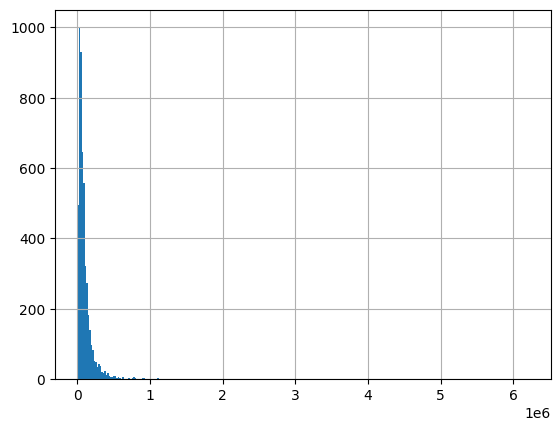

In [1153]:
# The first two rows seem to be clear outliers.
# Let's make a histograph distribution to see it clearly.
df['Salary'].hist(bins=300)

From the histogram and the table above listing the max values, we can see that there are
some clear outliers. the histogram is compressed because there are values all over
to the right (namely the CEO and National director), which is skewing the salary data.

<Axes: >

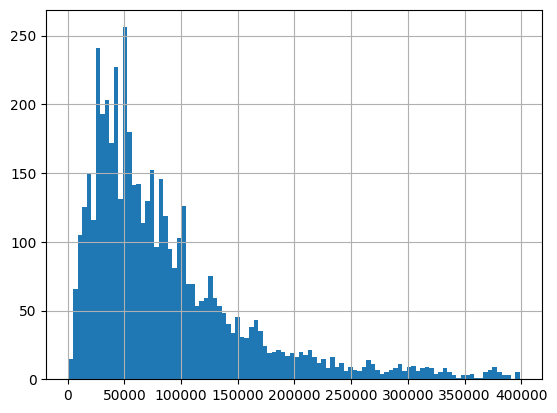

In [1154]:
# Let's filter out the salaries which are over 4000000
filter_df = df[df['Salary'] < 400000]
filter_df['Salary'].hist(bins=100)

In [1155]:
# We still have plenty of data to provide meaningful insights.
# The distribution is not perfect but is likely enough to work with.
filter_df.count()

Company Name         4996
Job Title            5000
Role                 5000
Salaries Reported    5000
Location             5000
Salary               5000
dtype: int64

We still have plenty of data to provide meaningful insights.
The distribution is not perfect but is likely enough to work with.

---

<ul>
<li>If we want to correlate upon categories, we need to handle them with the correct procedures.  <b>Convert the Role-column with the appropriate method, and add the new column to the DataFrame.</b></li>
<ul>
<li><b>Note:</b> see the pandas-materials how to handle binary –columns (you can also use category mapping in this case!)</li>
</ul>
</ul>

In [1156]:
# examples for handling different categorical variables can be found in Moodle
# also check the pandas -materials on how to convert different types of categories correctly

<ul>
<li><b>Finally, check out the correlations. Does anything correlate with anything? Can we make any assumptions?</b></li>
<ul>
<li>Tip: When correlating against binary variables, sometimes the Spearman correlation might be more sensitive, in pandas:</li>
</ul>
</ul>

In [1157]:
# Remember: df.corr(method="spearman", numeric_only=True)

<b>Extra tasks for this dataset</b><br><br>

<ul>
<li>After all salaries have been converted to correct format by using the helper function (check Moodle), use quantiles and split the data into four different parts, based on salary:</li>
<ul>
<li><span style="color: red;">Top 25%</span><br>=> quantile(0.75)</li>
<li><span style="color: red;">Above average, values between top 25-50%</span><br>
=> quantile(0.5)  - quantile(0.75)</li>
<li><span style="color: red;">Below average, values between top 50-75% </span><br>
=> quantile(0.25) – quantile(0.5)
</li>
<li><span style="color: red;">Bottom 25%</span><br>=> quantile(0.25)</li>
<br>
<li>What are the salary ranges for each quantile?</li><li>
See examples in pandas-materials on how to use quantiles
</li>
</ul>
</ul>
<hr>

<ul>
<li>Did you get any ideas how this data could be improved? Do we need some particular new data or some other operations on the data? Should we filter something out based on some other column?<br><br><b>Provide arguments for your answers in code comments.</b><br><br> </li>
<ul>
<li>Note: There are many good possible answers here!</li>
<li>Tip: How about replacing the "Salaries Reported" column with actual rows based on that number? Try doing this with the data!</li>
<li>Remember: This data only represents data engineering salaries based on selected Indian cities.
The world is a vast place :)
</li>
</ul>
</ul>

In [1158]:
# code for the extra tasks


<h2><b>Advanced extra tasks for extra points (varying challenges, some require Googling):</b></h2>

<ul>
<li><b>1. Data merge is a useful tool when you have multiple files of data that have the exact same structure.</b><br><br>Download the two csv-files from Moodle (videogames1.csv, videogames2.csv), and combine them into one DataFrame. Lastly, save the Data Frame into a new csv-file => combined.csv.</li>
</ul>

In [1159]:
# code for the advanced extra task

<ul>
<li><b>2. Functions and lambdas allow us to extend the operations we wish to do to columns and rows in pandas. </b><br><br>For example, the built-in functions may not be enough in all cases. Use the data of exercise 1 (loans.csv), and create a new column called "Income Group" that holds a text value. <br><br>Create either a function or a lambda that creates an income group based on Annual Income. Use the following ranges to create the values:</li>
</ul>

<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_2/es2_3.png"/>

<li>After creating the function/lambda, you can use it by using pandas' .apply() –function.<br><br></li>

<li>Finally, get the amount of rows grouped by each of the new Income Group –field values and print them out. <b>(value_counts() is handy here!)</b></li> 


In [1160]:
# code for the advanced extra task

<ul>
<li><b>3.	Normalization allows us to convert the values of numeric columns to be between 0 and 1.</b> This is helpful when two different numbers seem to follow the same trend, but have completely different value ranges. For example, gold and silver prices tend to follow similar patterns, but their market worth is quite different. By using normalization, we can compare these trends more easily. <br>

Get historical prices of both gold and silver, and compare them without and with normalization. You can plot the prices by using df.plot() –function. Check the dataset in list in Moodle for some alternatives for gold and silver prices.
</li>
</ul>
<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_2/es2_4.png" />

<ul>
<li><b>4.	Create an account to kaggle.com, and find any dataset that interests you. </b><br>

There's a list of possibly interesting datasets listed in Moodle as well.
<br><br>
<b>Try to find interesting features in data, in particular:</b>
</li>
<ul>
<li>Clean up data first (rows with too many NaN –values), values that are way too big or small, insignificant columns etc.)</li>
<li>You can create new columns as well if it seems suitable! (either by using functions or other means)</li>
<li>Interesting correlations (.corr() –function) and other interesting features in the data. Is something surprising in the data?</li>
<li><b>Note: </b>There are many ways on how to approach this exercise.</li>
</ul>
</ul>
<br />
<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_2/es2_5.png" />


In [1161]:
# do any Kaggle.com -related extra tasks in their own Jupyter notebooks for easier coding